In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
from tensorflow.keras.datasets.mnist import load_data

(xTrain, yTrain), (xTest, yTest) = load_data()

In [64]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [65]:
xTrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [66]:
# One hot encoding
pd.DataFrame(xTrain[0]).to_clipboard()

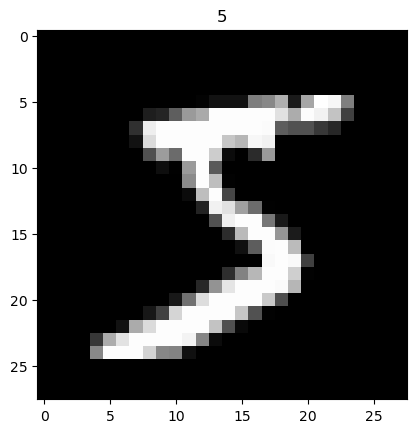

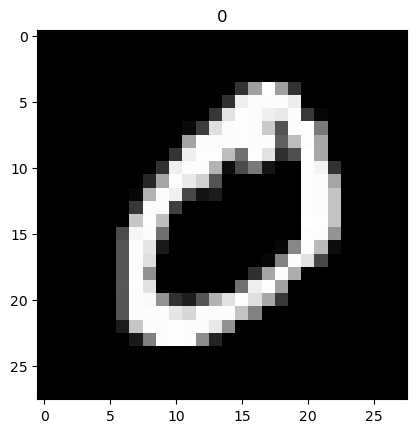

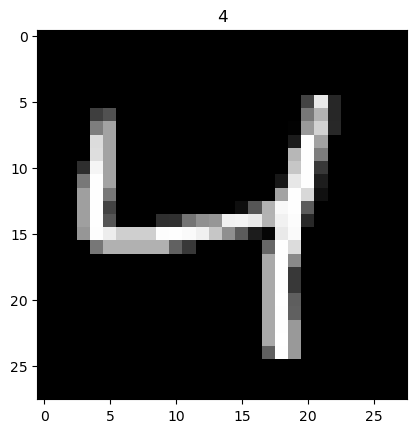

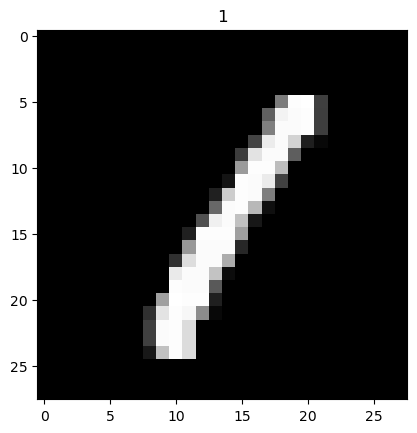

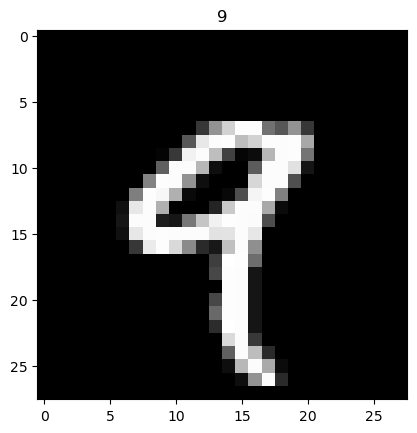

In [67]:
for i in range(5):
    plt.imshow(xTrain[i], cmap = "grey")
    plt.title(yTrain[i])
    plt.show()

In [68]:
xTrain[0].shape

(28, 28)

In [69]:
# Reshape images for Conv2D: (batch_size, height, width, channels)
xTrain = xTrain.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values
xTest = xTest.reshape(-1, 28, 28, 1) / 255.0

In [70]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [71]:
yTrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [72]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding labels
yTrain = to_categorical(yTrain, num_classes=10)
yTest = to_categorical(yTest, num_classes=10)

In [73]:
yTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [74]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [76]:
# Define the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2), strides=(1,1), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(2,2), strides=(1,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(2,2), strides=(1,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())  # Flatten before passing to Dense layers
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=32, activation="relu"))
model.add(Dropout(0.1))  # 10% dropout
model.add(Dense(units=10, activation="softmax"))  # Output layer

In [77]:
model.compile(optimizer=Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [78]:
model.fit(x = xTrain, y=yTrain, validation_split=0.3 ,epochs = 20,
          validation_data = (xTest, yTest), 
          batch_size = 1000)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.3988 - loss: 1.8068 - val_accuracy: 0.9068 - val_loss: 0.3353
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.8923 - loss: 0.3569 - val_accuracy: 0.9547 - val_loss: 0.1537
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.9367 - loss: 0.2081 - val_accuracy: 0.9630 - val_loss: 0.1172
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.9517 - loss: 0.1592 - val_accuracy: 0.9727 - val_loss: 0.0908
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.9624 - loss: 0.1248 - val_accuracy: 0.9767 - val_loss: 0.0755
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.9694 - loss: 0.1008 - val_accuracy: 0.9775 - val_loss: 0.0719
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9706 - loss: 0.0936 - val_accuracy: 0.9818 - val_loss: 0.0641
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.9775 - loss: 0.0764 - val_accuracy: 0

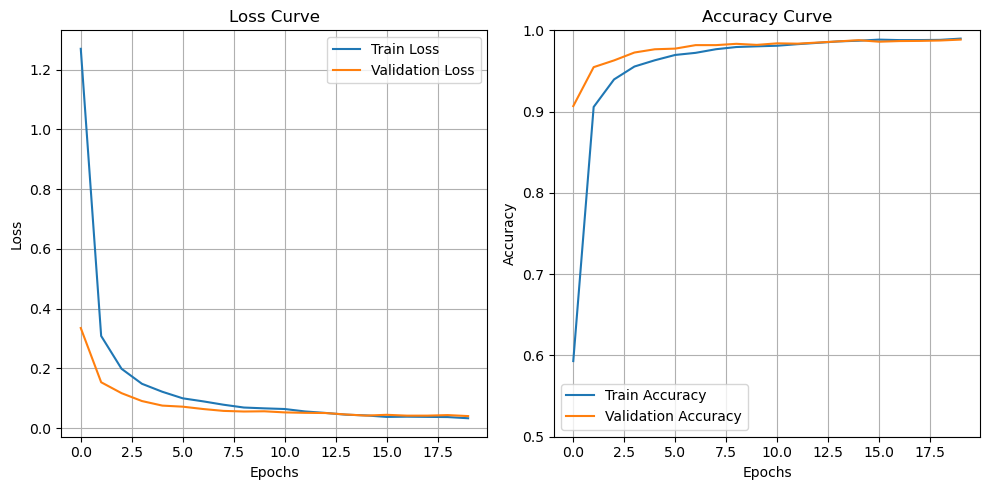

In [84]:
trainLoss = model.history.history["loss"]
valLoss = model.history.history["val_loss"]

train_acc = model.history.history['accuracy']
valAcc = model.history.history['val_accuracy']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Loss Curve
axes[0].plot(trainLoss, label="Train Loss")
axes[0].plot(valLoss, label="Validation Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].set_title("Loss Curve")
axes[0].legend()
axes[0].grid()

# Accuracy Curve
axes[1].plot(train_acc, label="Train Accuracy")
axes[1].plot(valAcc, label="Validation Accuracy")
axes[1].set_ylim(0.5, 1)
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Accuracy Curve")
axes[1].legend()
axes[1].grid()

# Show plots
plt.tight_layout()
plt.show()

In [81]:
print(train_acc[-1])
print(valAcc[-1])

0.9898333549499512
0.9886000156402588


In [83]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,304 (1.28 MB)

 Trainable params: 111,434 (435.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,870 (870.59 KB)